# Assignment 3 - Data Analysis

The goal of this assignment is to provide data analysis within the context of a business application. The topic we are going to cover is about patient comments in regards to drug effects.

I decided to develop all the analysis in Python, with the support of Jupyter notebook that allows me to mix code with text. The main reason of this choise is because Python is an open source tool while SAS is a closed source and does not support transparent functionalities. This enable me to learn something I can easily re-use in the future.

This assignment will be elaborated through the following steps:

0. Data pre-processing

1. Question 1

2. Question 2

3. Question 3

4. Question 4

5. Question 5

### Data pre-processing

This introductory step is probably the most important for the completion of the project. We were giving more than one thousand text files in regards to patient comments to drug effects. This step is aiming to move all this file texts into a more manageable dataframe. This will make our analysis much easier and assist us with graphical display and text mining.

Some crucial aspects of this phase will be explained in details (Some comments are left in the code to help the reader better understand the flow.

In [586]:
# IMPORTANT LIBRARIES IMPORT
import os   #read from files
import pandas as pd
import re  #regular expression
import numpy as np
import matplotlib.pyplot as plt #graphical display
import matplotlib as mp
import collections #count number of occurence within a list/series type
from sklearn.feature_extraction.text import CountVectorizer  #text mining
from nltk.corpus import stopwords    #text mining
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

Below some important variables and lists are specified. In particular:

- *dosage_1* and *dosage_2* are regular expression that are able to capture the dosage of the medication that patients take. 

- *meds* is a list of all medications that can be found in our patient comments.

- *side_effects* is a list of all possible effects that a patient can experience after using a prescription drug.

- *sleep_side_effects* will be used later on in Question3. This is a list of some of the common effect related to sleep issues.


In [587]:
#Please adjust this path according to where you saved the textfiles
path = '/Users/Francesco/Desktop/Francesco/University/BigDataTechnologies/Assignment3/DrugDest/'
dosage_1 = '[0-9]+[\.][0-9]+\s?mg\.?' #this detects if there a number DOT number  mg
dosage_2 ='[\d]+\s?mg\.?' #this just detects numbers with mg

meds = [
'Abidal',
'Abradon',
'Acquil',
'Ambutrin',
'Amelorex',
'Amicoran',
'Amlican',
'Aquiven',
'Attentor',
'Bifental',
'Captalan',
'Celifen',
'Cenerol',
'Concordan',
'Detall',
'Donital',
'Ecstapin',
'Elevex',
'Escalan',
'Espican',
'Essequal',
'Exulactin',
'Formilan',
'Fortifex',
'Gemulex',
'Habillan',
'Halinol',
'Hydrazan',
'Ibuprofen',
'Imitap',
'Indrazine',
'Intanol',
'Isolex',
'Maril',
'Meriflex',
'Nextam',
'Noderall',
'Noricam',
'Norulen',
'Parzonal',
'Perinol',
'Placilam',
'Prexifan',
'Promican',
'Pronizen',
'Quiescal',
'Raniculex',
'Reculan',
'Reqlyx',
'Reqlyz',
'Respirex',
'Respitan',
'Revinor',
'Septamyl',
'Suprizol',
'Sustify',
'Tacifen',
'Tanilor',
'Taplex',
'Tenactol',
'Vanquixal',
'Zindol'
]

side_effects = [
'Abdominal pain',
'Aggression',
'Agitation',
'Allergic reaction',
'Amnesia',
'Anemia',
'Back pain',
'Blindness',
'Blurred vision',
'Bone pain',
'Breast pain',
'breathing',
'Chest pain',
'Chills',
'Cold symptoms',
'Colitis',
'Colored vision',
'Confusion',
'Constipation',
'Cough',
'Diabetes mellitus',
'Diarrhea',
'Dizziness',
'Dry mouth',
'Dyspepsia',
'Exhaustion',
'Fainting',
'Fast heartbeat',
'Fever',
'Fluid in the lungs',
'Frequent urination',
'Hair loss',
'Hallucinations',
'Headache',
'Heart attack',
'Heart palpitations',
'Heartburn',
'Hepatitus',
'High blood pressure',
'Hostile',
'Hostility',
'Hyperactive',
'Hyperglycemia',
'Impulsive',
'Indigestion',
'Insomnia',
'Intestinal bleeding',
'Irregular heartbeat',
'Irritability',
'Irritable',
'Itching',
'Jaundice',
'Joint pain',
'Ketoacidosis',
'Kidney failure',
'Leg cramps',
'Liver damage',
'Loss of appetite',
'Low blood cell counts',
'Low blood pressure',
'Lower respiratory infection',
'Moodiness',
'Muscle pain',
'Nausea',
'Nightmares',
'Overly excited',
'Palpitations',
'Pancreatitis',
'Panicky',
'Personality disorder',
'Postural hypotension',
'Pulmonary thrombosis',
'Rectal bleeding',
'Seizures',
'Severe skin reactions',
'Severely restless',
'shortness of breath',
'Shortness of breath',
'Skin rash',
'Sleeplessness',
'Slow heartbeat',
'Sore throat',
'Spasm',
'Speech disorder',
'Stomach bleeding',
'Stomach pain',
'Stroke',
'Sweating',
'Sweats',
'Swelling',
'Thrombosis',
'tinnitus',
'Tiredness',
'Upper respiratory infection',
'Upset Stomach',
'urinary retention',
'Urinary tract infection',
'vertigo',
'Vomiting',
'Weakness',
'Weight gain',
'Weight loss'
]

sleep_side_effects=['issues sleeping',
                    'trouble sleeping',
                    'not sleeping',
                    'cannot sleep',
                    '''can't sleep''',
                    'could not sleep',
                    'insomnia',
                    'sleeplessness',
                    'lack of sleep',
                    'without sleep',
                    'inability to sleep',
                    'wakefulness',
                    'cant sleep',
                    'nightmares']

The following code snippet aims to read each individual text file and return a series of lists. These lists will be populated with the appropriate content. 

For example, the list *meds_present* will be populated with the medications present in a certain file text. If more than one medications is present in a single text file a list will be generated.
Therefore, technically speaking, these are list of lists.

A simple example has been given in order to better explain what said above.

*file1139.txt.txt*="My psychiatrist has me on 120 mg daily of Abidal. It seems to be working. I started out on 60 mg and then had to go up to 90 mg and am now on 120 mg. I was on Ecstapin prior to Abidal."

The list *meds_present* for that particular index will be populated with the following list.

*meds_present* = ["Ecstapin","Abidal"] 

Finally, a dataframe will be built from the given populated lists.

In [588]:
#Those list will be generated during the loop and will be the "base" of the dataframe
file_name = []
l = [] #this is a list that contains the complete patient comment
dos_1 = []
dos_2 = []
meds_present = []
side_effect_present = []
sleep_effect_present = []


fileList = os.listdir(path) #listdir returns a list of all the txtfiles in the DrugDest folder
for i in fileList:
    file = open(os.path.join(path+ i), 'r') #open each file in reading mode
    #read file
    text = file.readlines()
    file_content = text[0] 
    #add file name and content to list
    file_name.append(i)
    l.append(file_content)
    #regex to check for dosage1 and dosage1
    dos_1.append(re.findall(dosage_1, file_content))
    dos_2.append(re.findall(dosage_2, file_content))
    #check if any meds name or side effect is present and add to list
    med = [word for word in meds if word.lower() in file_content.lower()]
    meds_present.append(med)
    effect = [word for word in side_effects if word.lower() in file_content]
    side_effect_present.append(effect)
    #check if any sleep effect is present and add to list (important for question 3)
    sleep_effect=[word for word in sleep_side_effects if word.lower() in file_content]
    sleep_effect_present.append(sleep_effect)
    
    
#df = pd.DataFrame(file_name)
df = pd.DataFrame()
df['file_name']=file_name
df['text'] = l
df['dos_1'] = dos_1
df['dos_2'] = dos_2
df['med'] = meds_present
df['side_effect'] = side_effect_present
df['sleep_effect'] = sleep_effect_present

It is always a good habit to check if the created dataframe matches the initial expectations. Therefore, the first 5 lines will be visualized. 
In addition, we want to check the total number of documents and if that particular example given above (*file1139.txt*) actually returns "Ecstapin"and "Abidal" in the medication present.

In [589]:
df.head()

,file_name,text,dos_1,dos_2,med,side_effect,sleep_effect
0,file1.docx.txt,This medication made me gain 40 pounds it has ...,[],[],[],[],[]
1,file10.txt.txt,have been on 10mg prexifan for 6 months along ...,[],"[10mg, 2000mg, 1mg]","[Fortifex, Gemulex, Noderall, Prexifan]",[],[]
2,file100.txt.txt,"At first I liked it, I took it along with Esca...",[],[5mg.],[Escalan],[],[]
3,file1000.txt.txt,This drug caused extreme nausea and didn't hel...,[],[],[],[Nausea],[]
4,file1001.txt.txt,When I started using Abidal I was running the ...,[],"[60 mg, 30 mg.]","[Abidal, Ecstapin]",[Nausea],[]


In [590]:
print("The total number of documents is",df.shape[0])

The total number of documents is 1414


In [591]:
df[df.file_name=='file1139.txt.txt'].med

139    [Abidal, Ecstapin]
Name: med, dtype: object

The medications *Ecstapin* and *Abidal* have been found for that particular patient comment.

### Question 1 -> How many documents mention a medication, or a dosage, or a side effect?


##### How the chart(s) was/were produced

In order to answer this question we need to be able to count how many documents mention a medication or a dosage or a side effect. To achieve this, a preliminary boolean list for each category will be created. 
For example, *is_med_present* returns a list of boolean where:

- True means that the document mentions a certain medication
- False means that the document does not mention any medication

Similar comment can be done for *is_dosage_present* and *is_side_effect_present*.

Finally, we only need to count how many True are present in each boolean list and plot a graph.

In [592]:
# Get a boolean list representing which row satisfies the condition 
is_med_present = df.apply(lambda x: True if len(x['med'])>0  else False , axis=1)
is_dosage_present = df.apply(lambda x: True if (len(x['dos_1'])>0 or len(x['dos_2'])>0) else False , axis=1)
is_side_effect_present = df.apply(lambda x: True if len(x['side_effect'])>0  else False , axis=1)

# Count number of True in series
count_meds_is_present = len(is_med_present[is_med_present == True].index)
count_dosage_is_present = len(is_dosage_present[is_dosage_present == True].index)
count_side_effect_is_present = len(is_side_effect_present[is_side_effect_present == True].index)

##### Chart 

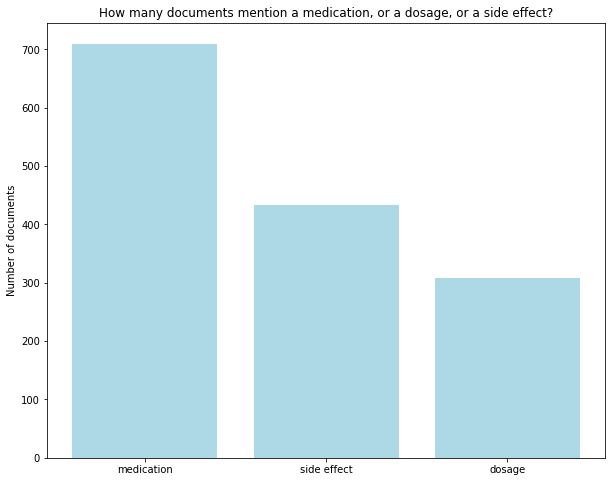

In [593]:
objects = ('medication', 'side effect', 'dosage')
values = [count_meds_is_present, count_side_effect_is_present, count_dosage_is_present]

#Bar plot is the suitable graph for since we are dealing with a categorical variable
plt.figure(figsize=(10,8)) #size of the plot
plt.bar(objects, values,color=['lightblue'])
plt.ylabel('Number of documents')
plt.title('How many documents mention a medication, or a dosage, or a side effect?')
plt.show()


##### Discussion

Bar chart is one of the best graphical display for a categorical variable. According to the graph, the majority of the documents mentioned a medication, followed by a side effect and then a dosage.
To be precise, the following print statement sums up the correct number of documents per category.

In [594]:
print('The number of documents that mention a medication is',count_meds_is_present)
print('The number of documents that mention a side effect is',count_side_effect_is_present)
print('The number of documents that mention a dosage is',count_dosage_is_present)

The number of documents that mention a medication is 710
The number of documents that mention a side effect is 433
The number of documents that mention a dosage is 308


### Question 2 -> How many documents mention each medication?

Display the counts of number of documents that mention each of the following medications:

- Abidal
- Cenerol
- Ecstapin
- Fortifex
- Prexifan

##### How the chart(s) was/were produced

Similarly to what we have done in Question 1, the goal here is counting how many documents mention the selected medications given above.
Once again, I will create preliminary boolean lists that are able to detect whether a certain medication is present in that patient comment.
For example, *is_med_wt_Abidal* returns a list of boolean where:

- True means that document mentions Abidal
- False means that document does not mention Abidal

Finally, we only need to count how many True are present in each boolean lists and plot a graph.

In [595]:
wt=['Abidal','Cenerol','Ecstapin','Fortifex','Prexifan'] #selected medications

# Get a boolean list representing which row satisfies the condition
is_med_wt_Abidal = df.apply(lambda x: True if wt[0] in x['med'] else False , axis=1)
is_med_wt_Cenerol = df.apply(lambda x: True if wt[1] in x['med'] else False , axis=1)
is_med_wt_Ecstapin = df.apply(lambda x: True if wt[2] in x['med'] else False , axis=1)
is_med_wt_Fortifex = df.apply(lambda x: True if wt[3] in x['med'] else False , axis=1)
is_med_wt_Prexifan = df.apply(lambda x: True if wt[4] in x['med'] else False , axis=1)

#Count number of True in series
is_Abidal = len(is_med_wt_Abidal[is_med_wt_Abidal == True].index)
is_Cenerol = len(is_med_wt_Cenerol[is_med_wt_Cenerol == True].index)
is_Ecstapin = len(is_med_wt_Ecstapin[is_med_wt_Ecstapin == True].index)
is_Fortifex = len(is_med_wt_Fortifex[is_med_wt_Fortifex == True].index)
is_Prexifan = len(is_med_wt_Prexifan[is_med_wt_Prexifan == True].index)


##### Chart 

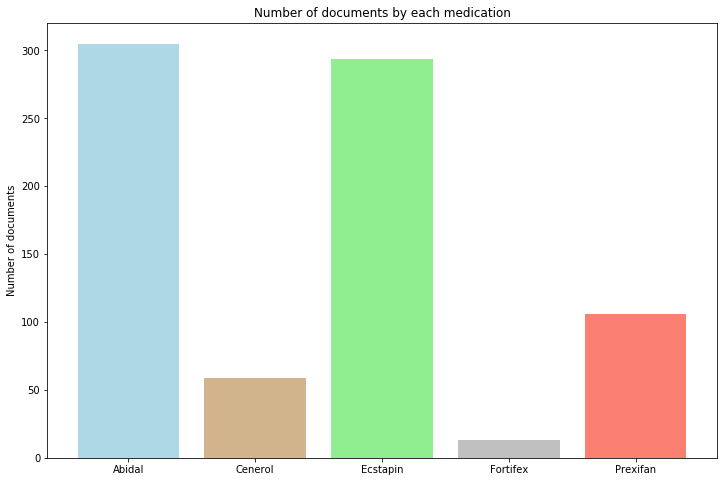

In [596]:
objects = ('Abidal','Cenerol','Ecstapin','Fortifex','Prexifan')
values = [is_Abidal, is_Cenerol, is_Ecstapin,is_Fortifex,is_Prexifan]

plt.figure(figsize=(12,8)) #size of the plot
plt.bar(objects, values,color=['lightblue','tan','lightgreen','silver','salmon'])
plt.ylabel('Number of documents')
plt.title('Number of documents by each medication')

plt.show()

##### Discussion 

The bar chart shows that Abidal and Ecstapin are the medications that are more frequent in the documents within the selected medications. In addition, Fortifex is the medication that has been mentioned the least with less than 50 counts.
To be precise, the following print statement sums up the correct number of documents per medication.

In [597]:
print('The number of documents that mention Abidal is',is_Abidal)
print('The number of documents that mention Cenerol is',is_Cenerol)
print('The number of documents that mention Ecstapin is',is_Ecstapin)
print('The number of documents that mention Fortifex is',is_Fortifex)
print('The number of documents that mention Prexifan is',is_Prexifan)

The number of documents that mention Abidal is 305
The number of documents that mention Cenerol is 59
The number of documents that mention Ecstapin is 294
The number of documents that mention Fortifex is 13
The number of documents that mention Prexifan is 106


### Question 3 -> Which medications are associated with sleep issues? 

Identify the medications that are associated with sleep issues. Your chart or charts should clearly indicate which medications have stronger associations with sleep issues, and they should quantify the degree of association.

##### How the chart(s) was/were produced

The first approach of this question made me think that *side_effect = Sleeplessness* was enough to identify all the documents associated with sleep issues. However, by looking at some documents, I found that some of those had  patients that complained about sleep issues but those were not captured by *side_effect = Sleeplessness*.

An example of this scenario is given below.

In [598]:
df[df.file_name=='file1475.txt.txt']

,file_name,text,dos_1,dos_2,med,side_effect,sleep_effect
499,file1475.txt.txt,I've found that over the 10 years I've been ta...,"[37.5 mg, 37.5 mg]","[5 mg, 5 mg]","[Ecstapin, Escalan, Exulactin]","[Constipation, Dizziness, Irritable]",[trouble sleeping]


This example above shows that for this particular document there is no *Sleeplessness* as side_effect. However, if we show part of the entire message, we can clearly see how this patient actually experienced sleep issues ("*trouble sleeping*").

*file1475.txt.txt* = 'I've found that over the 10 years I've been taking Ecstapin.....I have become more irritable, have trouble sleeping, and have had an increase with ADD.....'

This fact made me create a list of sleep effects (*sleep_side_effects* see Data pre-processing). In this list, I included this group of words that may relate with sleep issues. Words such as *'trouble sleeping'* or '*not sleeping*' are only some values within this list.
The following print statement assists us to visualize all this words that have strong connection with sleep issues.

In [599]:
print(list(sleep_side_effects))

['issues sleeping', 'trouble sleeping', 'not sleeping', 'cannot sleep', "can't sleep", 'could not sleep', 'insomnia', 'sleeplessness', 'lack of sleep', 'without sleep', 'inability to sleep', 'wakefulness', 'cant sleep', 'nightmares']


Similarly of what we previously did with medications, in the data preprocessing step, the list *sleep_effect* will be populated with the sleep issues presents in the documents. In fact, we can see from the previous example how *trouble sleeping* was correctly captured by the dataframe attribute.

The next step is creating a new dataframe. We need to select a subdata by filtering those rows where a sleep effect is present.
In conclusion, we need to count the number of medications that are associated with sleep issues. To achieve this, the function *Counter* from the *Collection* library has been used. 

In [600]:
## Get a boolean list representing which row satisfies the condition
is_sleep_present = df.apply(lambda x: True if len(x['sleep_effect'])>0  else False , axis=1)
#62 documents have been found with sleep issues

#filtering the initial dataframe
sf=df[is_sleep_present==True]['med']
df_sleep=pd.DataFrame({'med':sf.values})

#create an instance of the object Counter
c = collections.Counter()

#loop over the dataframe rows and count the occurences for each medication.
for index, row in df_sleep.iterrows():
    sleep_concern = row['med']
    c.update(sleep_concern)
print(c)

Counter({'Abidal': 27, 'Ecstapin': 22, 'Prexifan': 12, 'Elevex': 9, 'Exulactin': 6, 'Fortifex': 5, 'Promican': 5, 'Cenerol': 4, 'Escalan': 4, 'Noricam': 3, 'Amicoran': 2, 'Perinol': 1, 'Tenactol': 1, 'Vanquixal': 1, 'Respitan': 1, 'Isolex': 1, 'Sustify': 1, 'Formilan': 1, 'Imitap': 1, 'Revinor': 1, 'Noderall': 1, 'Norulen': 1})


The Counter object returns an ordered dictionary of medication occurrences. From this dictionary we have all the list of medications that are related with sleep issues and their degree of associations.

The following chart will illustrate only the most common 5 medication. 

##### Chart 

In [601]:
#most_common returns a smaller dictionary with all the 5 most common items
a=c.most_common(5)

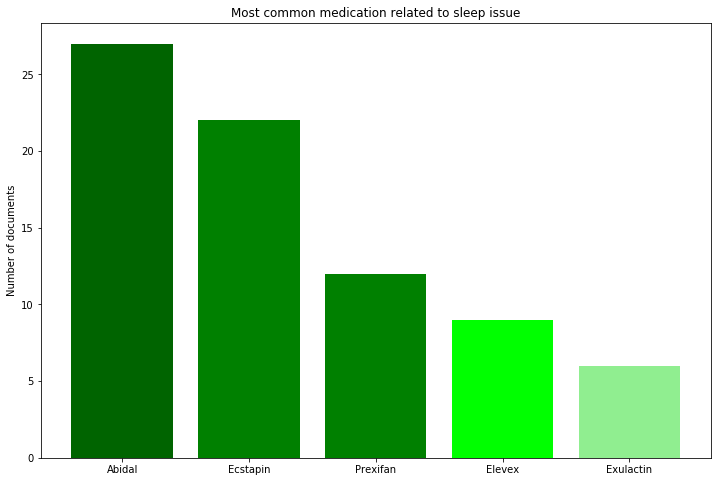

In [602]:
objects = (a[0][0],a[1][0],a[2][0],a[3][0],a[4][0])
values = [a[0][1],a[1][1],a[2][1],a[3][1],a[4][1]]

plt.figure(figsize=(12,8)) #size of the plot

plt.bar(objects, values,color=['darkgreen','green','green','lime','lightgreen'])
plt.ylabel('Number of documents')
plt.title('Most common medication related to sleep issue')

plt.show()

##### Discussion 

The bar chart above shows that Abidal is the medication that is more frequently associated with sleep issues.
The second medication is Ecstapin with 22 documents followed by Prexifan with 12.

The intensity of the colorbar (from darkgreen to lightgreen) better visualize the degree of the association.

### Question 4 -> What are the most common concerns expressed?

To complete this task, you need to determine the main concerns expressed in the posts.

##### How the chart(s) was/were produced

This question can be interpreted in different ways. My interpretation is counting the number of side effects related to documents. In fact, it is reasonable that the effect of a certain medication might be interpreded as a concern. 

Therefore words such as "*Nausea*","*Stomach pain*" or "*Panicky*" are fairly considered people concerns.

However, a more complete analysis will be implemented in Question 5.


A preliminary boolean list is created in order to filter those documents that contain at least one side effect. 
For example, *is_concern_present* returns a list of boolean where:

- True means that the document mentions at least one concern (side_effect)
- False means that the document does not mention any concern (side_effect)

In [605]:
# Get a boolean list representing which row satisfies the condition
is_concern_present = df.apply(lambda x: True if len(x['side_effect'])>0  else False , axis=1)
sf2=df[is_concern_present==True]['side_effect']

#create the support dataframe
df_concern=pd.DataFrame({'concerns':sf2.values})

print('The total number of documents that contain at least one concern are',df_concern.shape[0])

The total number of documents that contain at least one concern are 433


After creating a support dataframe, the next step is counting the total number of occurances for each concern. Once again the *Counter* object from the *collection* library will take care of this.

In [606]:
#create a counter object
d = collections.Counter()
#loop over the dataframe rows and count the occurences for each concerns.
for index, row in df_concern.iterrows():
    med_concern = row['concerns']
    d.update(med_concern) 

print(d)

Counter({'Nausea': 83, 'Weight gain': 77, 'Headache': 61, 'Dizziness': 57, 'Sweating': 43, 'Insomnia': 35, 'Sweats': 27, 'Nightmares': 26, 'Itching': 23, 'Vomiting': 23, 'Dry mouth': 21, 'Irritable': 18, 'Constipation': 17, 'Blurred vision': 15, 'Tiredness': 14, 'Chills': 11, 'High blood pressure': 11, 'Sleeplessness': 10, 'Spasm': 9, 'Irritability': 8, 'Back pain': 8, 'vertigo': 8, 'Upset Stomach': 7, 'Loss of appetite': 7, 'Joint pain': 6, 'Weakness': 6, 'Muscle pain': 5, 'Stroke': 5, 'Weight loss': 5, 'breathing': 4, 'Allergic reaction': 4, 'Exhaustion': 3, 'Fever': 3, 'Stomach pain': 3, 'Confusion': 3, 'Heart palpitations': 3, 'Palpitations': 3, 'Chest pain': 3, 'Seizures': 3, 'Personality disorder': 2, 'Skin rash': 2, 'Moodiness': 2, 'Heart attack': 2, 'Swelling': 2, 'Hyperactive': 2, 'Hallucinations': 2, 'Colitis': 1, 'Frequent urination': 1, 'Hostility': 1, 'Hostile': 1, 'urinary retention': 1, 'Fainting': 1, 'shortness of breath': 1, 'Shortness of breath': 1, 'Abdominal pain': 

The complete ordered list of concerns is shown above, however the following graph will show only the most common 10 concerns.

##### Chart 

In [607]:
#most coomon 10 concerns
b=d.most_common(10)

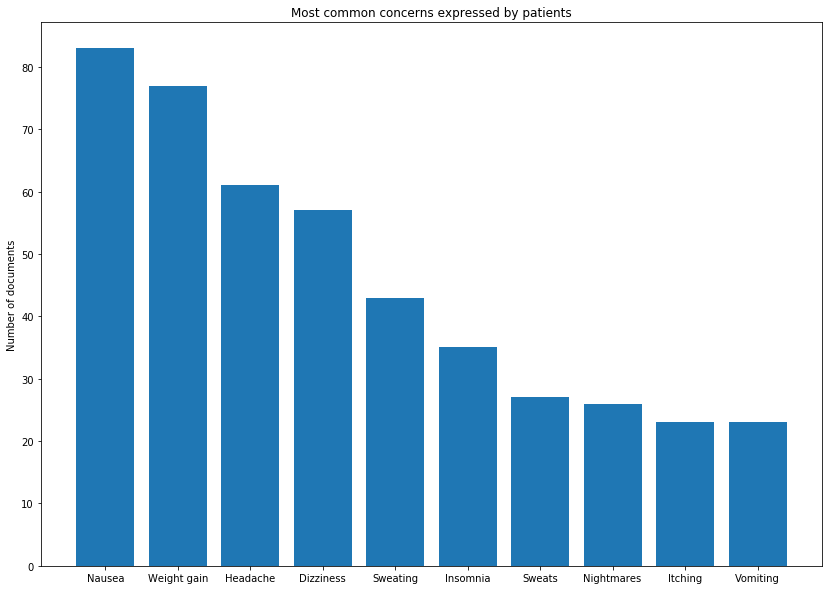

In [608]:
objects = (b[0][0],b[1][0],b[2][0],b[3][0],b[4][0],b[5][0],b[6][0],b[7][0],b[8][0],b[9][0])
values = [b[0][1],b[1][1],b[2][1],b[3][1],b[4][1],b[5][1],b[6][1],b[7][1],b[8][1],b[9][1]]

plt.figure(figsize=(14,10)) #size of the plot

plt.bar(objects, values)
plt.ylabel('Number of documents')
plt.title('Most common concerns expressed by patients')

plt.show()

##### Discussion 

From the bar chart above, we can see that the first three most common concerns are respectively: Nausea, Weight gain and Headache.

### Question 5 -> Provide useful additional information

This final task is open. Provide additional charts that would help the analyst find additional useful information about drug effects on patients.

##### How the chart(s) was/were produced

As mentioned in the Question 4, a deeper analysis of people concerns will be done for this task. The idea is checking whether we can discover extra concerns from the patient comments. The approach here is different from Question 4 where we identified some possible sleep issues and store into a list. In fact, listing all possible people concerns is impossible.

In order to extract some possible patterns from the documents, Text Mining will be used. 

The goal here is trying to "clean" the documents from those not important words and count word or group of words that are most common across the documents. 

Hopefully, this common words will add some addition insights.

In [609]:
# Create a new support dataframe
df_clean_text = pd.DataFrame()

#Let us convert all the text in lower case
df_clean_text['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove the stop words
stop = stopwords.words('english')
df_clean_text['text']  = df_clean_text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_clean_text['text'].head()

#remove/replace those characters that might create problems
df_clean_text['text'] = df_clean_text['text'].str.replace('[^\w\s]','')


#Stemming
st = PorterStemmer()
df_clean_text['text'] = df_clean_text['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

The highlights of the above code are:

- The documents has been converted in lower case.


- English stop words have been removed, and they refer to those words that are usually not important such as *this* or *there*.


- Stemming removes the part of a word that has the inflection to produce the stem. Therefore, for instance words such medication, medications or medicated will be in common to the root "medicat".

Once the text is in a cleaner format (additional checks may be done) we need to check those words that are common across the documents and see whether we can find something interesting. The following codes achieve this and we are checking common group of words that vary from 1 to 3 in lenght. 

##### Most frequent words (lenght = 1)

In [610]:
#Convert a collection of text documents to a matrix of token counts
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_clean_text['text'])
frequencies = sum(sparse_matrix).toarray()[0]
df_ngram_freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df_ngram_freq.sort_values(by=['frequency'], ascending=False).head(10)

,frequency
take,859
depress,722
effect,562
feel,550
work,531
drug,502
year,485
side,456
day,454
medic,449


The above table shows the ten most frequent words of length 1 in all the documents. Unfortunatelly, this does not look really interesting for our purposes.
Let us check the most common words of lenght 2.

##### Most frequent words (lenght = 2)

In [611]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_clean_text['text'])
frequencies = sum(sparse_matrix).toarray()[0]
df_ngram_freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df_ngram_freq.sort_values(by=['frequency'], ascending=False).head(20)

,frequency
side effect,399
feel like,97
weight gain,94
take it,76
stop take,73
take abid,69
start take,68
help depress,67
work well,63
depress anxieti,60


The above table shows the twenty most frequent words of length 2 in all the documents. 
This table is actually really interesting for the two following reasons:

- *weight gain* is a concern we were able to catch in question 4. In this case the frequency is slightly higher, but this might be explained by the fact that a certain document may contain this concern more than one time within the text.


- *brain zap* is definitely a concern we were not able to identify. According to his definition the term “brain zaps” refers to a withdrawal symptom common for individuals who cease taking certain medication for depression and anxiety 


Through text mining we found that the word *brain zap* was mentioned 46 times across the documents. This "new" concern will be added and highlighted in the "*Most common concerns expressed by patients*" plot.

##### Most frequent words (lenght = 3)

In [612]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_clean_text['text'])
frequencies = sum(sparse_matrix).toarray()[0]
df_ngram_freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df_ngram_freq.sort_values(by=['frequency'], ascending=False).head(20)

,frequency
sexual side effect,23
feel much better,17
bad side effect,16
start take abid,12
work well me,12
stop take it,12
high blood pressur,11
side effect bad,10
like new person,9
miss one dose,9


Finally, the above table shows the twenty most frequent words of length 3 in all the documents. Once again, we can immediately identify a "new" concern under the name *sexual side effect*  (the first row of this table). 

Lack of sexual desire and difficulties performing during intimate encounters can be symptoms of depression, but they can also be side effects of many medications used to treat depression.

This "new" concern will be added and highlighted in the "*Most common concerns expressed by patients*" plot.

##### Chart 

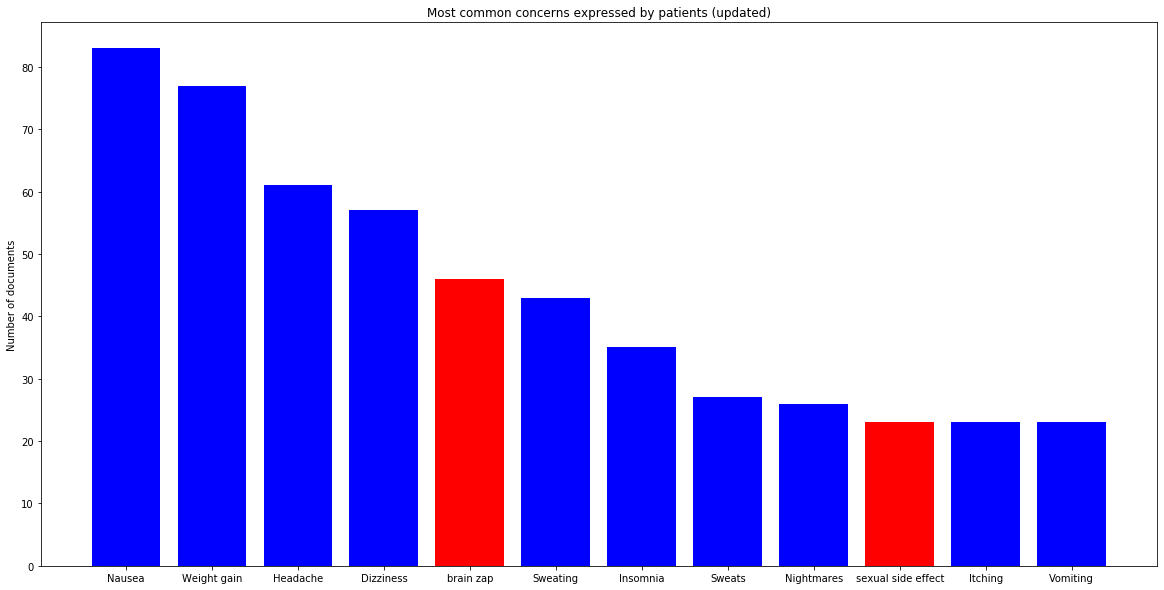

In [613]:
#inserting the two new concerns in the most common concerns expressed by patients list of tuples
b.insert(4,('brain zap',46))

b.insert(9,('sexual side effect',23))


objects = (b[0][0],b[1][0],b[2][0],b[3][0],b[4][0],b[5][0],b[6][0],b[7][0],b[8][0],b[9][0],b[10][0],b[11][0])
values = [b[0][1],b[1][1],b[2][1],b[3][1],b[4][1],b[5][1],b[6][1],b[7][1],b[8][1],b[9][1],b[10][1],b[11][1]]

plt.figure(figsize=(20,10)) #size of the plot

plt.bar(objects, values,color=['blue','blue','blue','blue','red','blue','blue','blue','blue','red','blue',])
plt.ylabel('Number of documents')
plt.title('Most common concerns expressed by patients (updated)')

plt.show()

##### Discussion 

The bar chart has now been updated with the new concerns we found from text mining (Red bars).
In conclusion, we were able to add two new concerns to this graph by applying text mining.